In [21]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('petrol_consumption.csv')

In [3]:
df.shape

(48, 5)

In [4]:
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [5]:
x = df.iloc[:, :4].values
y = df.iloc[:, 4].values

In [6]:
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Petrol_tax', ylabel='Petrol_Consumption'>

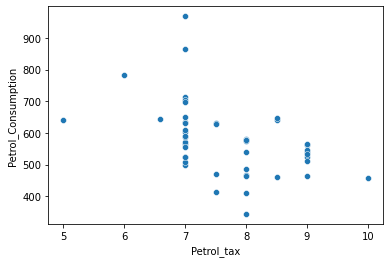

In [7]:
sns.scatterplot(df['Petrol_tax'], df['Petrol_Consumption'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Paved_Highways', ylabel='Petrol_Consumption'>

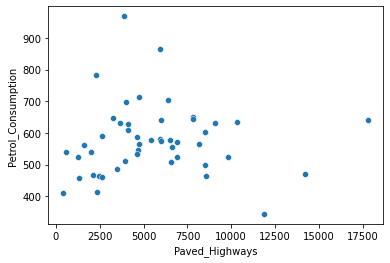

In [40]:
sns.scatterplot(df['Paved_Highways'], df['Petrol_Consumption'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Population_Driver_licence(%)', ylabel='Petrol_Consumption'>

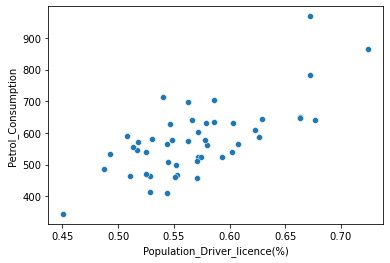

In [41]:
sns.scatterplot(df['Population_Driver_licence(%)'], df['Petrol_Consumption'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Average_income', ylabel='Petrol_Consumption'>

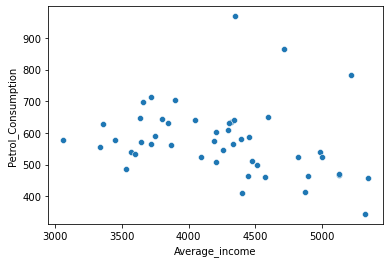

In [55]:
sns.scatterplot(df['Average_income'], df['Petrol_Consumption'])

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [10]:
from sklearn.ensemble import RandomForestRegressor

In [11]:
reg = RandomForestRegressor(n_estimators = 7, random_state = 0)
reg.fit(x_train, y_train)

RandomForestRegressor(n_estimators=7, random_state=0)

In [12]:
pred = reg.predict(x_test)

In [13]:
data = pd.DataFrame({'Actual': y_test, 'Predicted': pred})
data

,Actual,Predicted
0,699,634.285714
1,508,588.142857
2,525,522.428571
3,610,625.571429
4,591,619.142857
5,628,572.857143
6,577,598.285714
7,644,651.571429
8,457,464.714286
9,865,769.285714


In [23]:
from sklearn.tree import export_graphviz
from sklearn import tree

In [15]:
import numpy as np

feature_names = np.array(['Petrol_tax',' Average_income', 'Paved_Highways', 'Population_Driver_licence'])
target_name = np.array(['Petrol_Consumptio'])

In [16]:
feature_names

array(['Petrol_tax', ' Average_income', 'Paved_Highways',
       'Population_Driver_licence'], dtype='<U25')

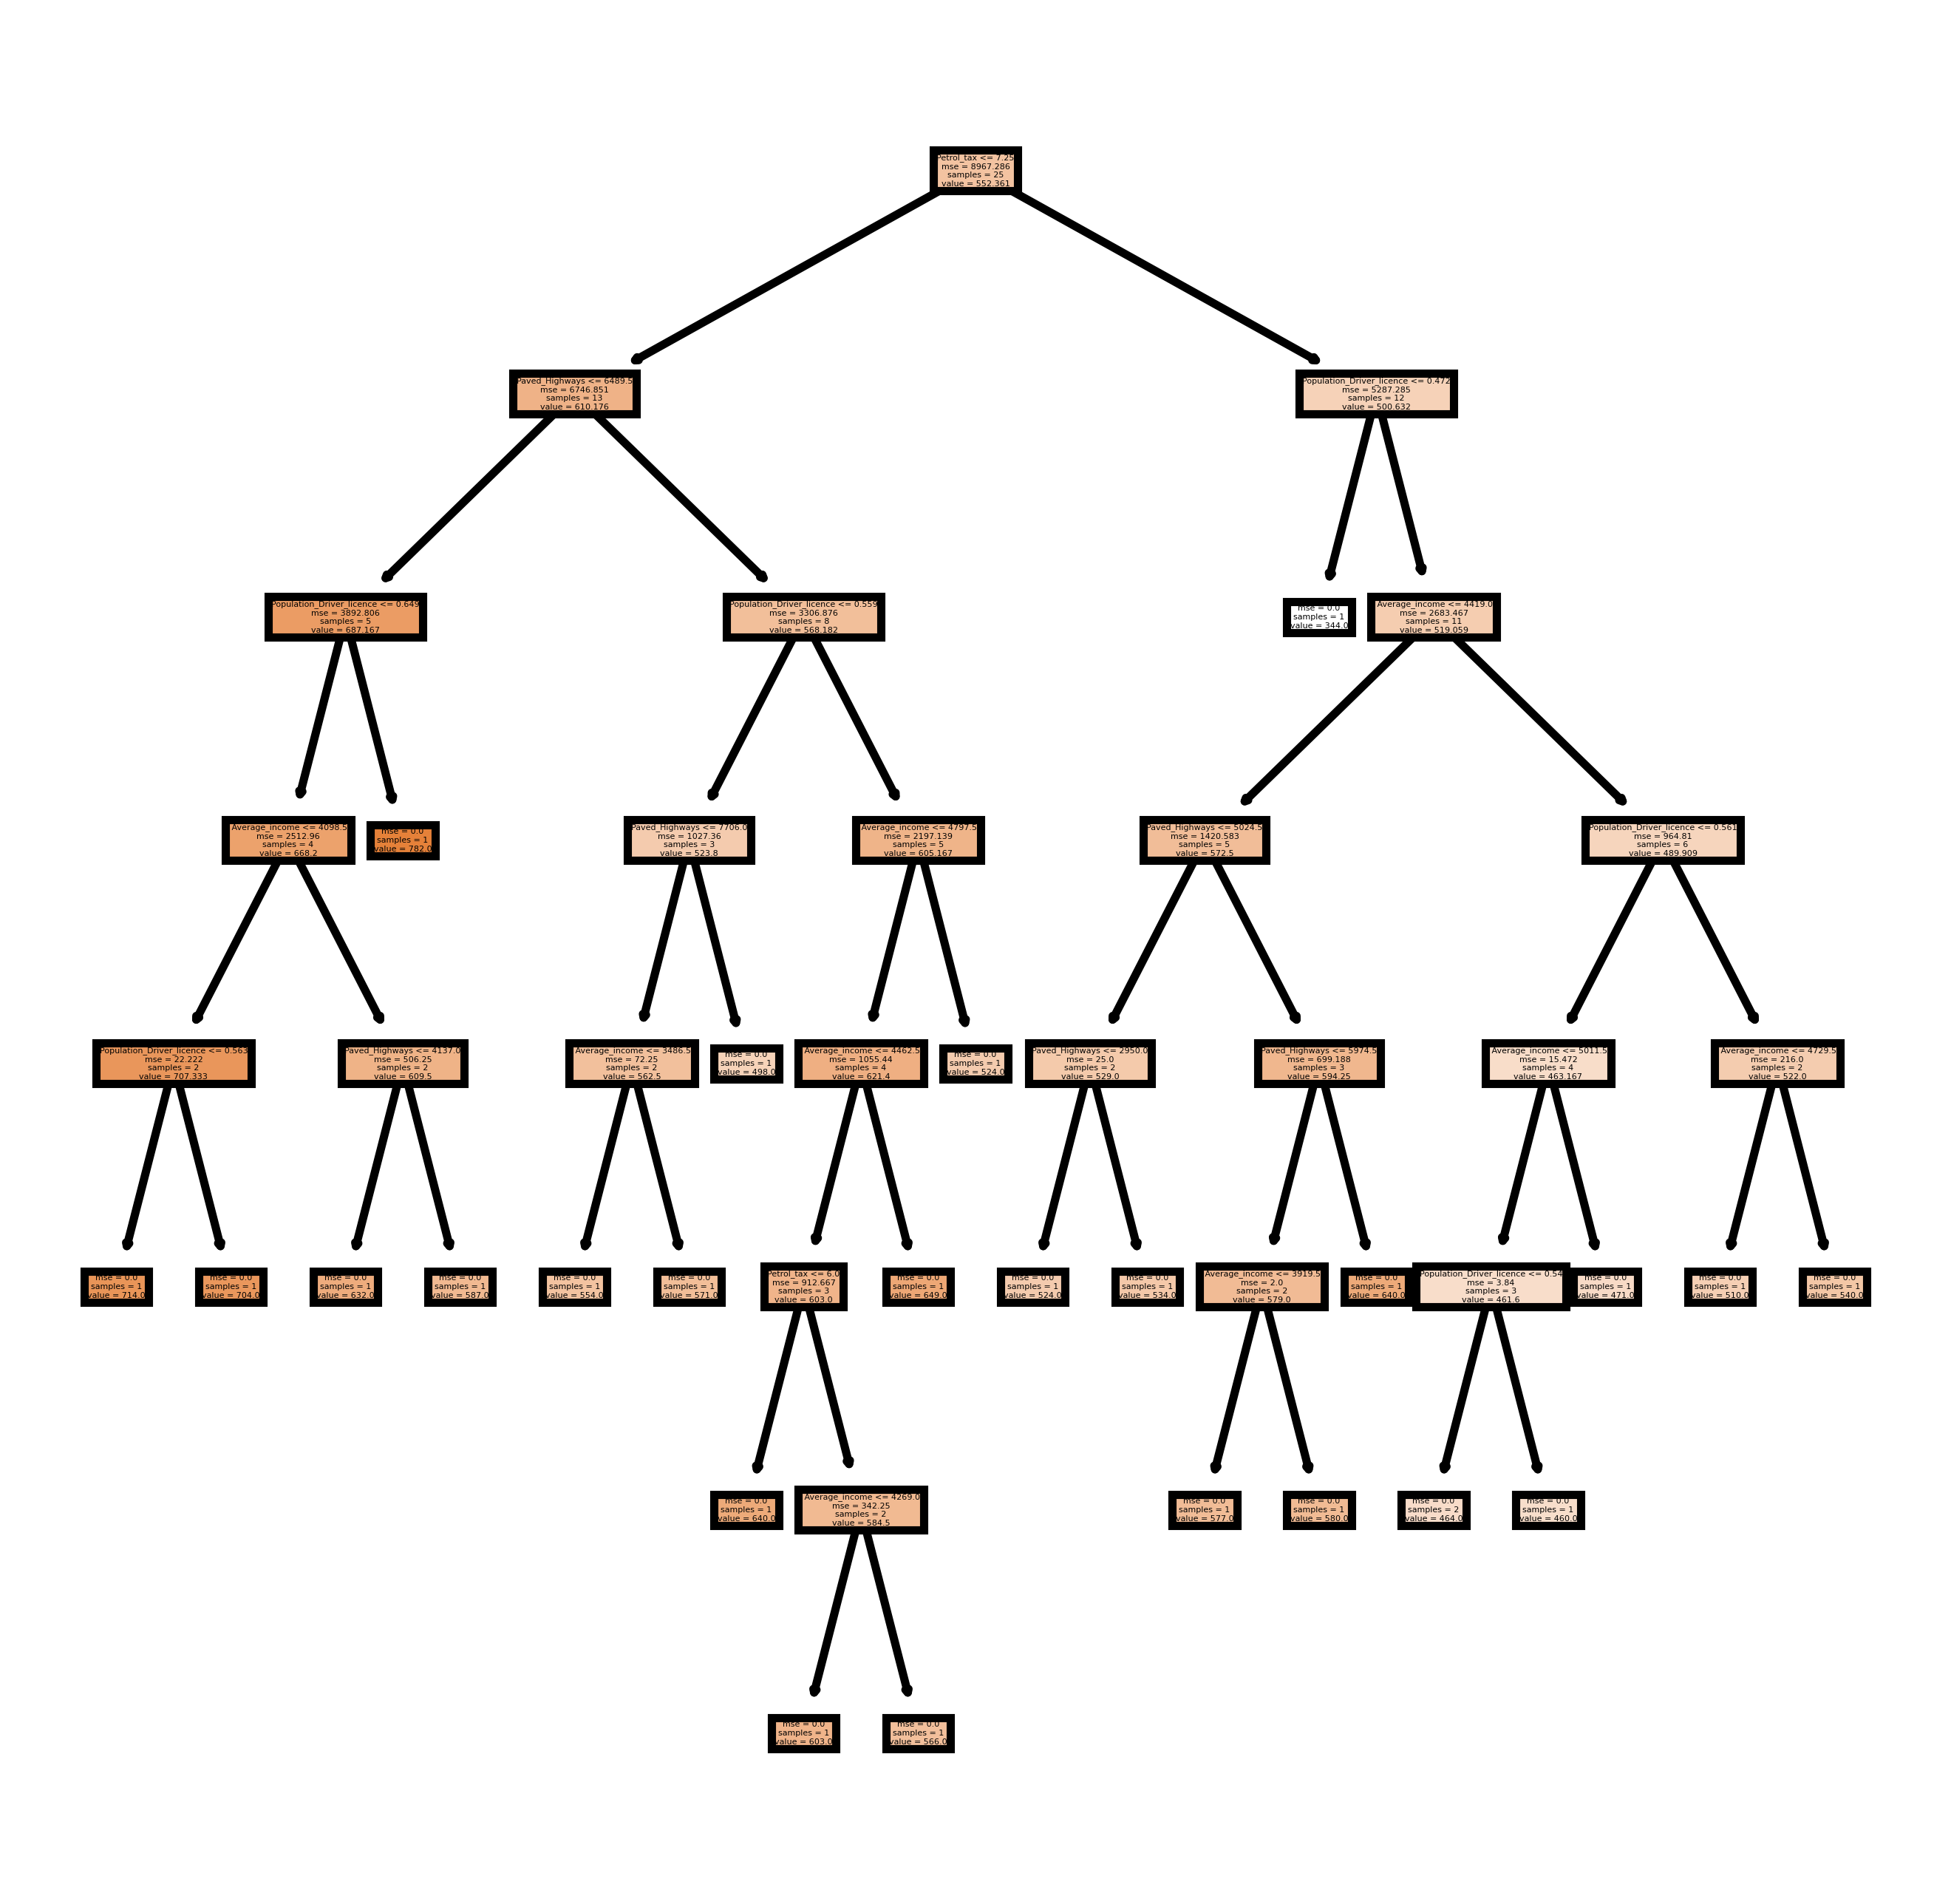

In [25]:
# to visualize the first decision tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(reg.estimators_[0],
               feature_names = feature_names, 
               class_names=target_name,
               filled = True);
fig.savefig('decisiontree.png')

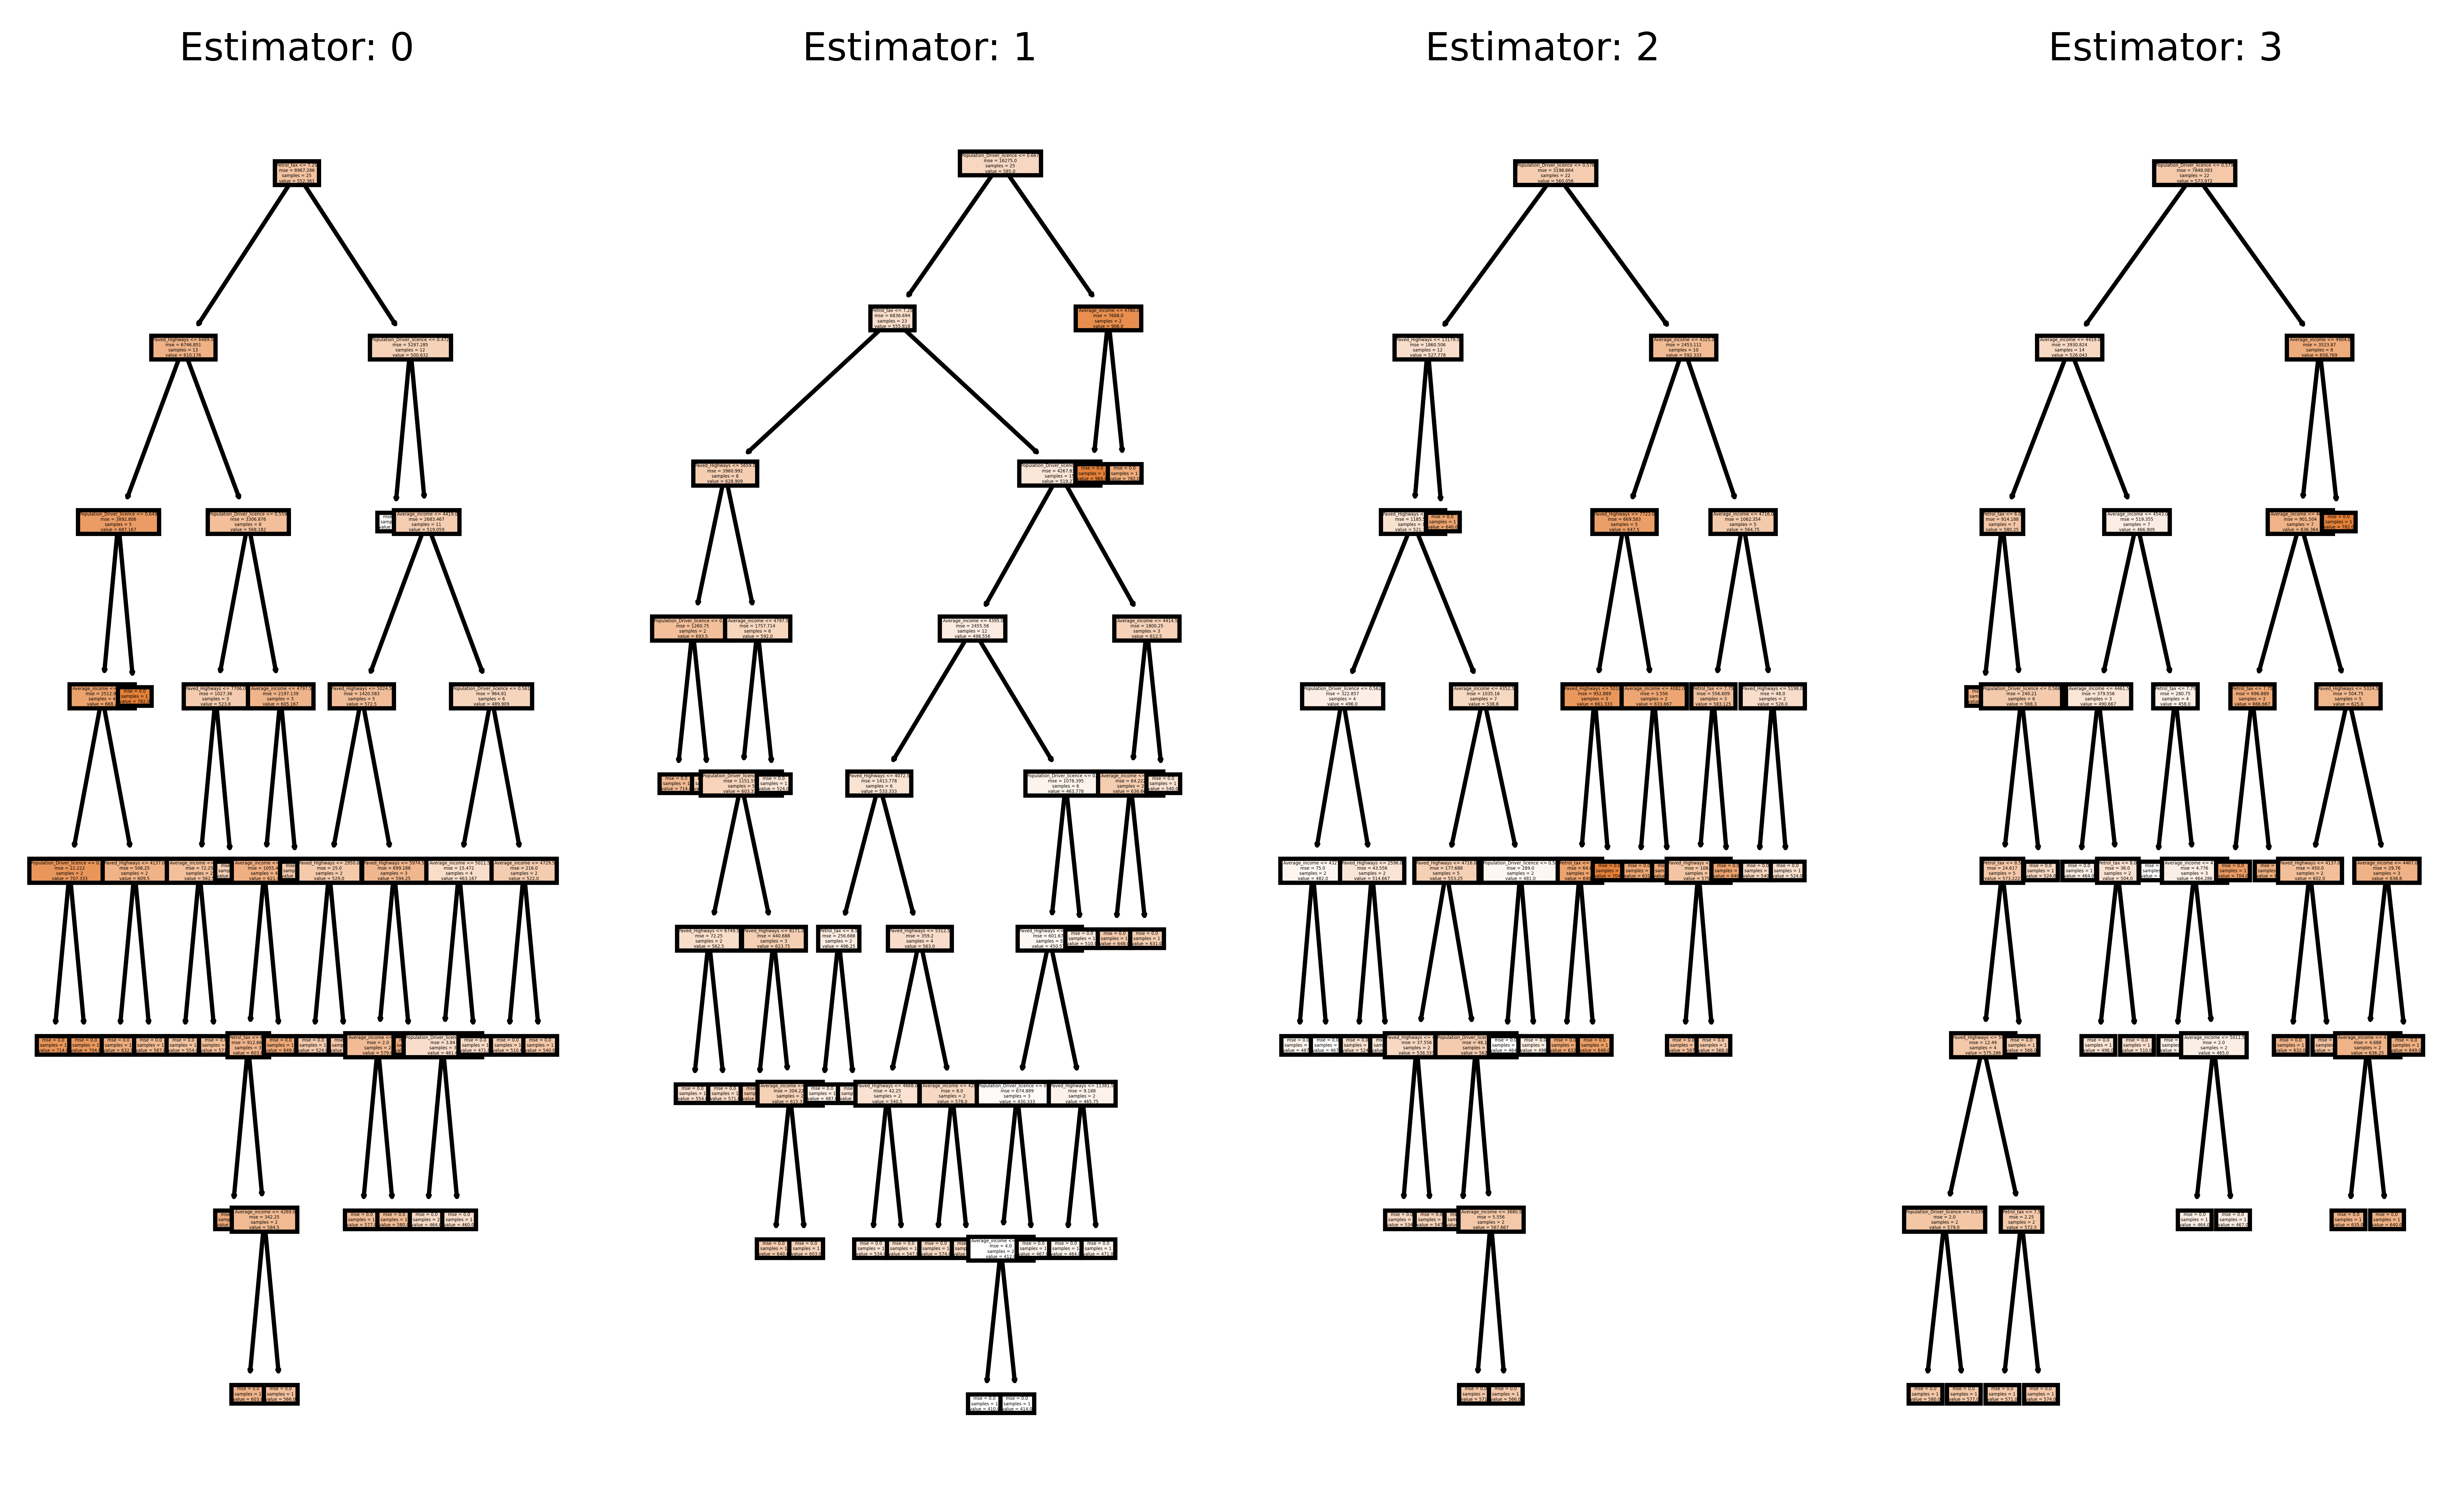

In [26]:
fig, axes = plt.subplots(nrows = 1, ncols = 4,figsize = (10,6), dpi=950)
for index in range(0, 4):
    tree.plot_tree(reg.estimators_[index],
                   feature_names = feature_names, 
                   class_names=target_name,
                   filled = True,
                   ax = axes[index])

    axes[index].set_title('Estimator: ' + str(index), fontsize = 9)
fig.savefig('RndomForesttrees.png')